Epoch 0, Loss: 0.2446, Accuracy: 33.33%
Epoch 1, Loss: 0.2416, Accuracy: 33.33%
Epoch 2, Loss: 0.2391, Accuracy: 33.33%
Epoch 3, Loss: 0.2371, Accuracy: 33.33%
Epoch 4, Loss: 0.2354, Accuracy: 33.33%
Epoch 5, Loss: 0.2339, Accuracy: 33.33%
Epoch 6, Loss: 0.2327, Accuracy: 33.33%
Epoch 7, Loss: 0.2317, Accuracy: 33.33%
Epoch 8, Loss: 0.2308, Accuracy: 33.33%
Epoch 9, Loss: 0.2300, Accuracy: 33.33%
Epoch 10, Loss: 0.2294, Accuracy: 33.33%
Epoch 11, Loss: 0.2288, Accuracy: 0.00%
Epoch 12, Loss: 0.2283, Accuracy: 0.00%
Epoch 13, Loss: 0.2278, Accuracy: 0.00%
Epoch 14, Loss: 0.2274, Accuracy: 0.00%
Epoch 15, Loss: 0.2270, Accuracy: 0.00%
Epoch 16, Loss: 0.2266, Accuracy: 0.00%
Epoch 17, Loss: 0.2263, Accuracy: 0.00%
Epoch 18, Loss: 0.2260, Accuracy: 0.00%
Epoch 19, Loss: 0.2257, Accuracy: 0.00%
Epoch 20, Loss: 0.2254, Accuracy: 0.00%
Epoch 21, Loss: 0.2252, Accuracy: 0.00%
Epoch 22, Loss: 0.2249, Accuracy: 0.00%
Epoch 23, Loss: 0.2247, Accuracy: 0.00%
Epoch 24, Loss: 0.2244, Accuracy: 0.00%

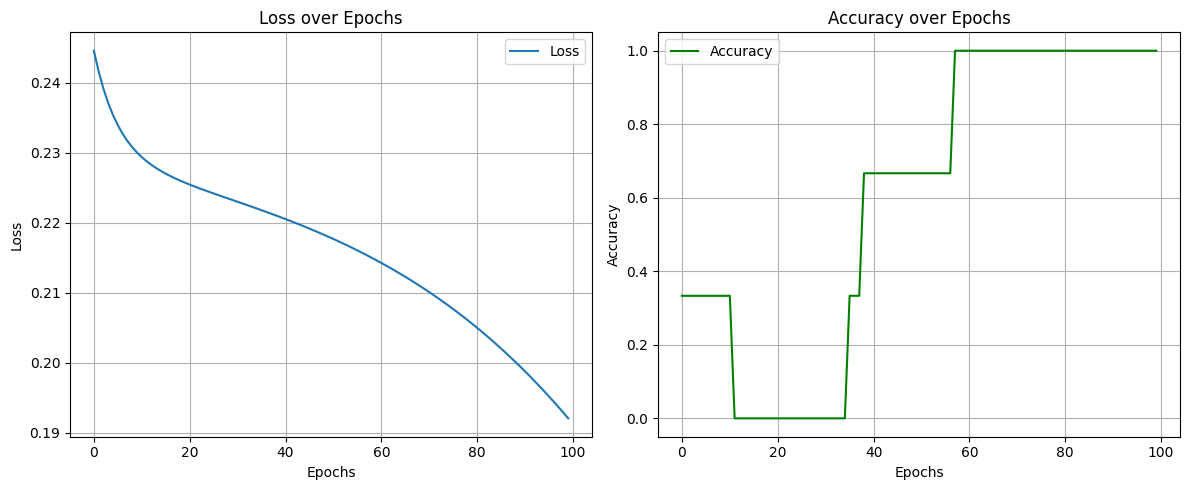

Showing prediction for letter: A


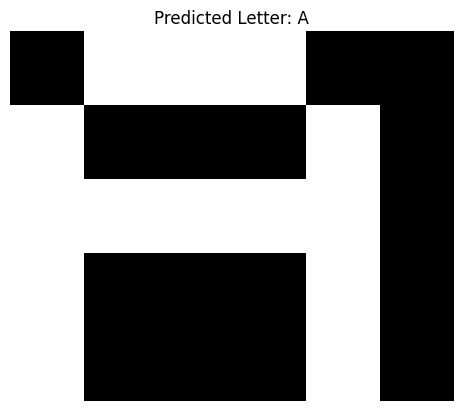

Showing prediction for letter: B


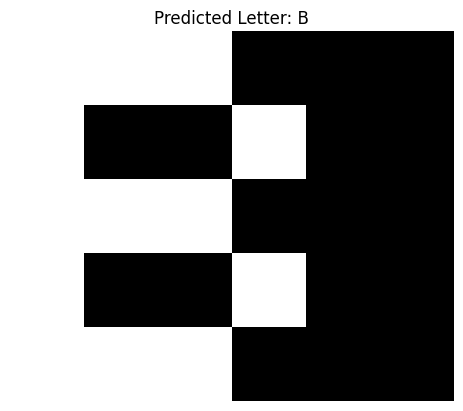

Showing prediction for letter: C


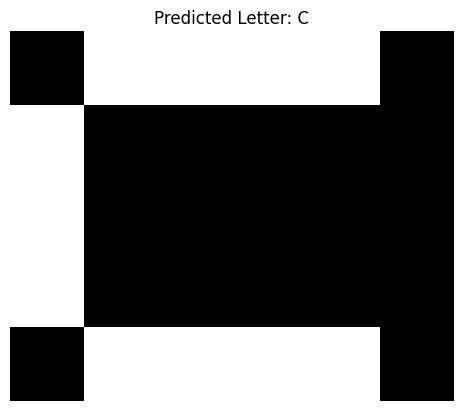

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- 1. Define Binary Patterns for A, B, C (5x6) ---
def create_letter_patterns():
    A = np.array([
        [0,1,1,1,0,0],
        [1,0,0,0,1,0],
        [1,1,1,1,1,0],
        [1,0,0,0,1,0],
        [1,0,0,0,1,0]
    ])

    B = np.array([
        [1,1,1,0,0,0],
        [1,0,0,1,0,0],
        [1,1,1,0,0,0],
        [1,0,0,1,0,0],
        [1,1,1,0,0,0]
    ])

    C = np.array([
        [0,1,1,1,1,0],
        [1,0,0,0,0,0],
        [1,0,0,0,0,0],
        [1,0,0,0,0,0],
        [0,1,1,1,1,0]
    ])
    return [A.flatten(), B.flatten(), C.flatten()]

# --- 2. Prepare Training Data ---
X_data = np.array(create_letter_patterns())
y_data = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])

# Normalize inputs
X_data = X_data.astype(np.float32)

# --- 3. Activation Functions ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# --- 4. Initialize Parameters ---
input_size = 30
hidden_size = 16
output_size = 3
learning_rate = 0.1
epochs = 100

W1 = np.random.randn(hidden_size, input_size) * 0.1
b1 = np.zeros((hidden_size, 1))

W2 = np.random.randn(output_size, hidden_size) * 0.1
b2 = np.zeros((output_size, 1))

loss_history = []
acc_history = []

# --- 5. Training Loop ---
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0

    for i in range(len(X_data)):
        x = X_data[i].reshape(-1, 1)
        y = y_data[i].reshape(-1, 1)

        # Forward Pass
        z1 = W1 @ x + b1
        a1 = sigmoid(z1)

        z2 = W2 @ a1 + b2
        a2 = sigmoid(z2)

        # Loss
        loss = np.mean((a2 - y)**2)
        epoch_loss += loss

        # Accuracy
        if np.argmax(a2) == np.argmax(y):
            correct += 1

        # Backpropagation
        dz2 = (a2 - y) * sigmoid_derivative(z2)
        dW2 = dz2 @ a1.T
        db2 = dz2

        dz1 = (W2.T @ dz2) * sigmoid_derivative(z1)
        dW1 = dz1 @ x.T
        db1 = dz1

        # Update Weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    loss_history.append(epoch_loss / len(X_data))
    acc_history.append(correct / len(X_data))

    #if epoch % 100 == 0 or epoch == epochs - 1:
    print(f"Epoch {epoch}, Loss: {loss_history[-1]:.4f}, Accuracy: {acc_history[-1]*100:.2f}%")

# --- 6. Plot Loss and Accuracy ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc_history, label="Accuracy", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# --- 7. Prediction & Display ---
def predict_and_display(image_vector):
    x = image_vector.reshape(-1, 1)
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    prediction = np.argmax(a2)
    label = ["A", "B", "C"][prediction]

    plt.imshow(image_vector.reshape(5,6), cmap='gray')
    plt.title(f"Predicted Letter: {label}")
    plt.axis("off")
    plt.show()

# Test on known data
for i in range(3):
    print(f"Showing prediction for letter: {['A','B','C'][i]}")
    predict_and_display(X_data[i])
